### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("train.csv")
X = np.array(df.loc[:,["GrLivArea", "YearBuilt"]])
y = np.array(df.loc[:,["SalePrice"]])

array([[1710, 2003],
       [1262, 1976],
       [1786, 2001],
       ...,
       [2340, 1941],
       [1078, 1950],
       [1256, 1965]])

### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

MSR:2725908099.063638
(1, 365)
(1, 365)


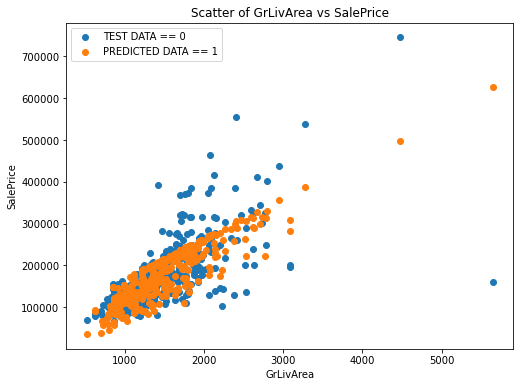

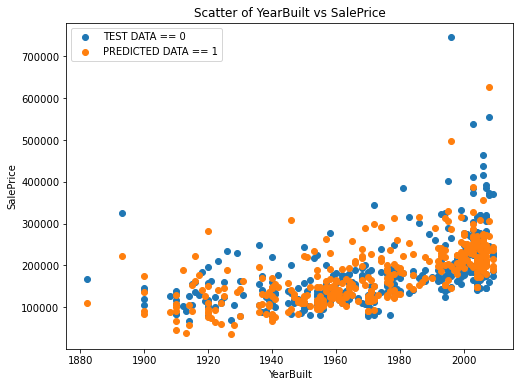

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#学習用データ、評価用データへの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#print("X_trainのデータ数{}".format(len(X_train)))
#print("X_testのデータ数{}".format(len(X_test)))
#print("y_trainのデータ数{}".format(len(y_train)))
#print("y_testのデータ数{}".format(len(y_test)))

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
scaler.transform(X_train)
scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(y_train)
scaler.mean_
scaler.transform(y_train)
scaler.transform(y_test)

#線形回帰による学習・予測・評価
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("MSR:{}".format(mean_squared_error(y_test, y_pred)))

#グラフ描画 GrLivArea
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(X_test[:,0], y_test, label='TEST DATA == 0')
plt.scatter(X_test[:,0], y_pred, label='PREDICTED DATA == 1')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Scatter of GrLivArea vs SalePrice")
plt.legend()
plt.show()

#グラフ描画 YearBuilt
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(X_test[:,1], y_test, label='TEST DATA == 0')
plt.scatter(X_test[:,1], y_pred, label='PREDICTED DATA == 1')
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("Scatter of YearBuilt vs SalePrice")
plt.legend()
plt.show()

### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。

その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、

どういった図になっていたかを述べてください。


線形回帰

SVM

決定木

ランダムフォレスト

MSR:6905505418.985159


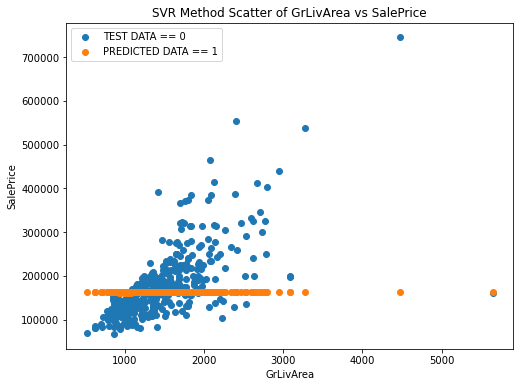

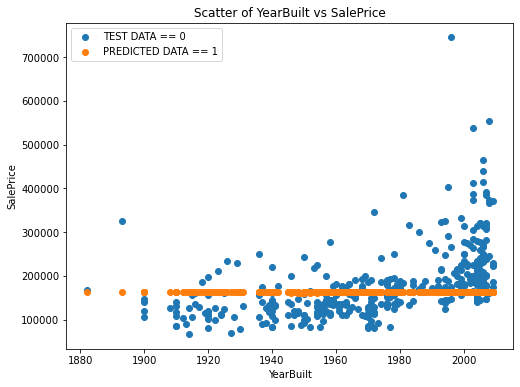

In [69]:
#SVMによる学習・予測・評価
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
scaler.transform(X_train)
scaler.transform(X_test)
scaler = StandardScaler()
scaler.fit(y_train)
scaler.mean_
scaler.transform(y_train)
scaler.transform(y_test)

y_train = y_train.flatten() #shapeを(n_sample, )の形にしないとWARNIGが表示されるため。
regr = make_pipeline(StandardScaler(), SVR(C=3.0, epsilon=0.2))
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#print(y_pred)
print("MSR:{}".format(mean_squared_error(y_test, y_pred)))

#グラフ描画 GrLivArea
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(X_test[:,0], y_test, label='TEST DATA == 0')
plt.scatter(X_test[:,0], y_pred, label='PREDICTED DATA == 1')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("SVR Method Scatter of GrLivArea vs SalePrice")
plt.legend()
plt.show()

#グラフ描画 YearBuilt
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(X_test[:,1], y_test, label='TEST DATA == 0')
plt.scatter(X_test[:,1], y_pred, label='PREDICTED DATA == 1')
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("Scatter of YearBuilt vs SalePrice")
plt.legend()
plt.show()

MSR:2011623868.1955051


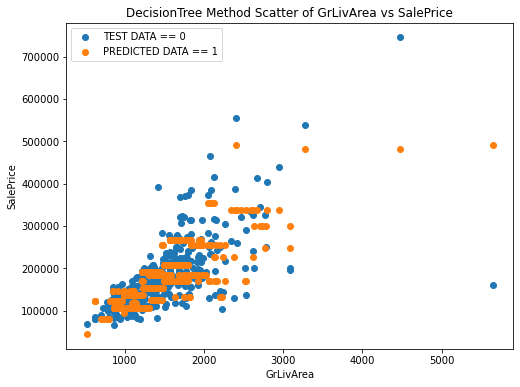

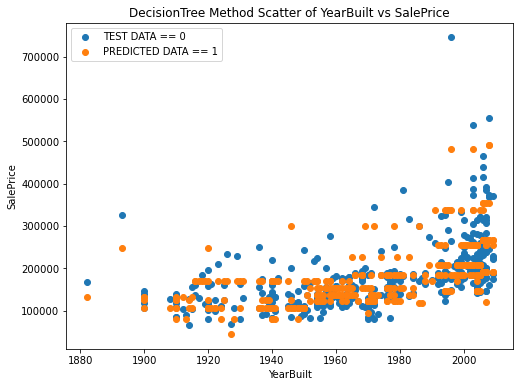

In [57]:
#決定木による学習・予測・評価
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
scaler.transform(X_train)
scaler.transform(X_test)
scaler = StandardScaler()
scaler.fit(y_train)
scaler.mean_
scaler.transform(y_train)
scaler.transform(y_test)

tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("MSR:{}".format(mean_squared_error(y_test, y_pred)))

#グラフ描画 GrLivArea
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(X_test[:,0], y_test, label='TEST DATA == 0')
plt.scatter(X_test[:,0], y_pred, label='PREDICTED DATA == 1')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("DecisionTree Method Scatter of GrLivArea vs SalePrice")
plt.legend()
plt.show()

#グラフ描画 YearBuilt
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(X_test[:,1], y_test, label='TEST DATA == 0')
plt.scatter(X_test[:,1], y_pred, label='PREDICTED DATA == 1')
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("DecisionTree Method Scatter of YearBuilt vs SalePrice")
plt.legend()
plt.show()

MSR:2775775068.044796


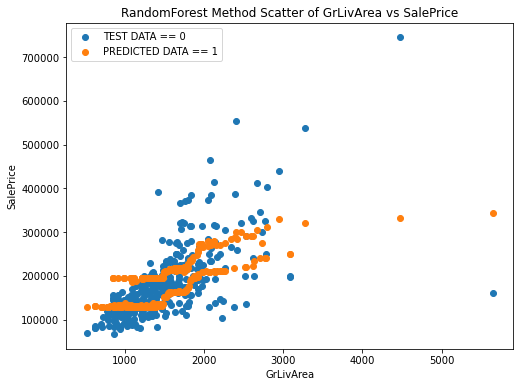

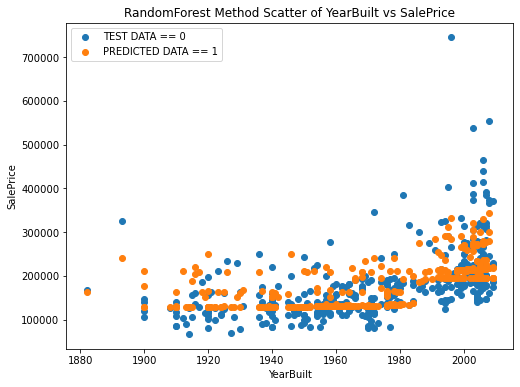

In [64]:
#ランダムフォレストによる学習・予測・評価
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
scaler.transform(X_train)
scaler.transform(X_test)
scaler = StandardScaler()
scaler.fit(y_train)
scaler.mean_
scaler.transform(y_train)
scaler.transform(y_test)

y_train = y_train.flatten() #shapeを(n_sample, )の形にしないとWARNIGが表示されるため。
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print("MSR:{}".format(mean_squared_error(y_test, y_pred)))

#グラフ描画 GrLivArea
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(X_test[:,0], y_test, label='TEST DATA == 0')
plt.scatter(X_test[:,0], y_pred, label='PREDICTED DATA == 1')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("RandomForest Method Scatter of GrLivArea vs SalePrice")
plt.legend()
plt.show()

#グラフ描画 YearBuilt
fig = plt.figure(figsize=(8, 6), dpi=72)
plt.scatter(X_test[:,1], y_test, label='TEST DATA == 0')
plt.scatter(X_test[:,1], y_pred, label='PREDICTED DATA == 1')
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("RandomForest Method Scatter of YearBuilt vs SalePrice")
plt.legend()
plt.show()

各手法による評価結果を下表にまとめた。
今回のケースでは、図示上では線形回帰、決定木がより良い推定ができていると考える。
MSRで評価すると決定木がもっとも良い推定となっている。
また、ランダムフォレストでも線形回帰に近いMSRとなっている。
SVMは予測値の分布が直線上となっており、今回の推定には不適と考える。
全体的にMSRが大きく、実際にはどの手法を用いるにしても最適化が必要と考える。

|      |  線形回帰  |  SVM  |   決定木   |  ランダムフォレスト   |
|:----:|  :----:  |     :----:       | :----:  | :----:   |
|MSR|  2725908099    |    6905505418          |  2011623868   |   2775775068  | 
|予測値の<br>散布図<br>形状| 実データに近い      |     直線上に分布          |    実データに近い |    階段上に分布  |
